# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

Link Data Studio

https://datastudio.google.com/open/1lDVSIPLpEUvbVjefKw1FD6TraCkNvKNS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
choco = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/01-chocolate-bar/chocolate.csv')

Local Folder

In [2]:
choco = pd.read_csv('data/01-chocolate-bar/chocolate.csv')

Exploratory data analysis

In [3]:
choco.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
choco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [5]:
choco.describe().T

,count,mean,std,min,25%,50%,75%,max
REF,1795.0,1035.904735,552.886365,5.0,576.000,1069.00,1502.0,1952.0
Review\nDate,1795.0,2012.325348,2.927210,2006.0,2010.000,2013.00,2015.0,2017.0
Rating,1795.0,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0


In [6]:
choco.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [7]:
original_colnames = choco.columns
new_colnames = ['company', 'species', 'REF', 'review_year', 'cocoa_percent',
                'company_location', 'rating', 'bean_type', 'bean_origin']
choco = choco.rename(columns=dict(zip(original_colnames, new_colnames)))

choco['cocoa_percent'] = choco['cocoa_percent'].str.replace('%', '').astype(float)/100
choco.head()

,company,species,REF,review_year,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [8]:
choco.describe().T

,count,mean,std,min,25%,50%,75%,max
REF,1795.0,1035.904735,552.886365,5.00,576.000,1069.00,1502.00,1952.0
review_year,1795.0,2012.325348,2.927210,2006.00,2010.000,2013.00,2015.00,2017.0
cocoa_percent,1795.0,0.716983,0.063231,0.42,0.700,0.70,0.75,1.0
rating,1795.0,3.185933,0.478062,1.00,2.875,3.25,3.50,5.0


In [9]:
choco.isnull().sum()

company             0
species             0
REF                 0
review_year         0
cocoa_percent       0
company_location    0
rating              0
bean_type           1
bean_origin         1
dtype: int64

In [10]:
choco['bean_type'] = choco['bean_type'].str.strip()

In [11]:
choco['bean_type'].replace('', 'Others', inplace = True)

In [12]:
choco['bean_type'] = choco['bean_type'].fillna(value = 'Others')

In [13]:
choco['bean_type'].head(10)

0     Others
1     Others
2     Others
3     Others
4     Others
5    Criollo
6     Others
7    Criollo
8    Criollo
9     Others
Name: bean_type, dtype: object

In [14]:
choco['bean_origin'] = choco['bean_origin'].str.strip()

In [15]:
choco['bean_origin'].replace('', 'Others', inplace = True)

In [16]:
choco['bean_origin'].isnull().value_counts()

False    1794
True        1
Name: bean_origin, dtype: int64

In [17]:
choco['bean_origin'] = choco['bean_origin'].fillna(value = 'Others')

In [18]:
choco['bean_origin'].isnull().value_counts()

False    1795
Name: bean_origin, dtype: int64

In [19]:
choco['bean_origin'].head(10)

0     Sao Tome
1         Togo
2         Togo
3         Togo
4         Peru
5    Venezuela
6         Cuba
7    Venezuela
8    Venezuela
9         Peru
Name: bean_origin, dtype: object

In [20]:
choco['bean_origin'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'Others', 'PNG, Vanuatu, Mad',
       'Panama', 'Papua New Gui

In [21]:
import re

In [22]:
def txt_prep(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

In [23]:
choco['bean_origin'].str.replace('.', '').apply(txt_prep).unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', 'Others', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo',
       'Philippines', 'Malaysia', 'Dominican Republic,Bali',
       'Venezuela,Africa,Brasil,Peru,Mexico', 'Gabon', 'Ivory Coast',
       'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda', 'Martinique',
       'Sao Tome,Principe', 'Vanuatu', 'Australia', 'Liberia',
       'Ecuador,Costa Rica', 'West Africa', 'Hawaii', 'St Lucia',
       'Costa Rica,Venezuela', 'Peru,Madagascar', 'Venezuela,Trinidad',
       'Trinidad,Tobago', 'Venezuela,Trinidad,Ecuador',
       'South America,Africa', 'India',
       'Africa,Carribean,Central America', 'Tobago',
       'Venezuela,Indonesia,Ecuador', 'Peru,Ecuado

In [24]:
choco['bean_origin'] = choco['bean_origin'].str.replace('.', '').apply(txt_prep)

In [25]:
choco['bean_origin'].value_counts().tail(10)

Suriname                               1
Ecuador,Madagascar,Papua New Guinea    1
Peru,Madagascar,Dominican Republic     1
Gabon                                  1
Nigeria                                1
Ecuador,Costa Rica                     1
Venezuela,Ecuador,Peru,Nicaragua       1
Madagascar,Java,Papua New Guinea       1
Peru,Ecuador,Venezuela                 1
Papua New Guinea,Vanuatu,Madagascar    1
Name: bean_origin, dtype: int64

In [26]:
(choco['bean_origin'].str.count(',') + 1).value_counts()

1    1739
2      38
3      12
5       3
4       3
Name: bean_origin, dtype: int64

In [27]:
choco['company_location'].sort_values().unique()

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [28]:
choco['company_location'] = choco['company_location']\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('Domincan Republic', 'Dominican Republic')

choco['company_location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'England', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Holland', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lithuania', 'Madagascar', 'Martinique', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland',
       'Singapore', 'South Africa', 'South Korea', 'Spain', 'St. Lucia',
       'Suriname', 'Sweden', 'Switzerland', 'U.S.A.', 'Venezuela',
       'Vietnam', 'Wales'], dtype=object)

In [29]:
choco['company'].str.lower().sort_values().nunique() == choco['company'].sort_values().nunique()

True

In [30]:
choco['is_blend'] = np.where(
    np.logical_or(choco['species'].str.lower().str.contains(',|(blend)|;'),
        choco['bean_origin'].str.lower().str.contains(',')
    )
    , 1
    , 0
)
choco['is_blend'].value_counts()

0    1149
1     646
Name: is_blend, dtype: int64

In [31]:
choco.groupby('is_blend').head(5)

,company,species,REF,review_year,cocoa_percent,company_location,rating,bean_type,bean_origin,is_blend
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Others,Sao Tome,0
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Others,Togo,0
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Others,Togo,0
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Others,Togo,0
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Others,Peru,0
23,Acalli,"Chulucanas, El Platanal",1462,2015,0.70,U.S.A.,3.75,Others,Peru,1
24,Acalli,"Tumbes, Norandino",1470,2015,0.70,U.S.A.,3.75,Criollo,Peru,1
26,Adi,"Vanua Levu, Toto-A",705,2011,0.80,Fiji,3.25,Trinitario,Fiji,1
28,Adi,"Vanua Levu, Ami-Ami-CA",705,2011,0.72,Fiji,3.50,Trinitario,Fiji,1
29,Aequare (Gianduja),"Los Rios, Quevedo, Arriba",370,2009,0.55,Ecuador,2.75,Forastero (Arriba),Ecuador,1


In [32]:
choco['is_domestic'] = np.where(choco['bean_origin'] == choco['company_location'], 1, 0)
choco['is_domestic'].value_counts()

0    1590
1     205
Name: is_domestic, dtype: int64

Export data in Google Drive

In [ ]:
export_csv = choco.to_csv (r'gdrive/My Drive/Colab Notebooks/data/01-chocolate-bar/export_chocolate.csv', index = None, header=True) 

Export data in Local Folder

In [33]:
export_csv = choco.to_csv (r'data/01-chocolate-bar/export_chocolate.csv', index = None, header=True) 

Visualization

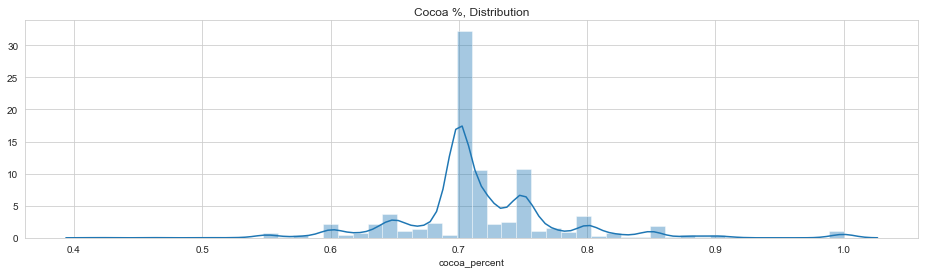

In [34]:
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(choco['cocoa_percent'], ax=ax)
ax.set_title('Cocoa %, Distribution')
plt.show()

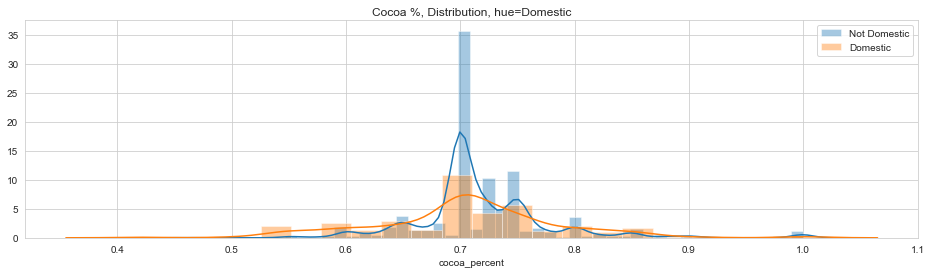

In [35]:
fig, ax = plt.subplots(figsize=[16,4])
for i, c in choco.groupby('is_domestic'):
    sns.distplot(c['cocoa_percent'], ax=ax, label=['Not Domestic', 'Domestic'][i])
ax.set_title('Cocoa %, Distribution, hue=Domestic')
ax.legend()
plt.show()

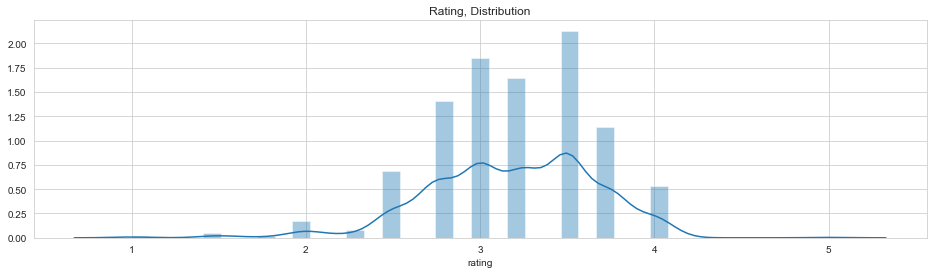

In [36]:
## Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(choco['rating'], ax=ax)
ax.set_title('Rating, Distribution')
plt.show()

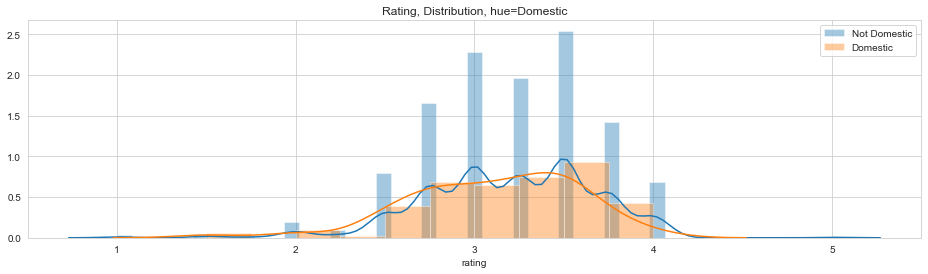

In [37]:
fig, ax = plt.subplots(figsize=[16,4])
for i, c in choco.groupby('is_domestic'):
    sns.distplot(c['rating'], ax=ax, label=['Not Domestic', 'Domestic'][i])
ax.set_title('Rating, Distribution, hue=Domestic')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Boxplot, Rating by Domestic')

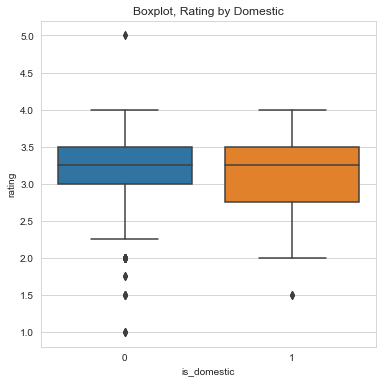

In [38]:
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=choco,
    x='is_domestic',
    y='rating',
)
ax.set_title('Boxplot, Rating by Domestic')

Text(0.5, 1.0, 'Boxplot, Rating by Blend/Pure')

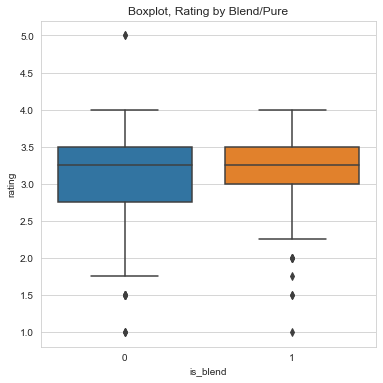

In [39]:
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=choco,
    x='is_blend',
    y='rating',
)
ax.set_title('Boxplot, Rating by Blend/Pure')

Text(0.5, 1, 'Goods Flow from origin to Company location, mean rating')

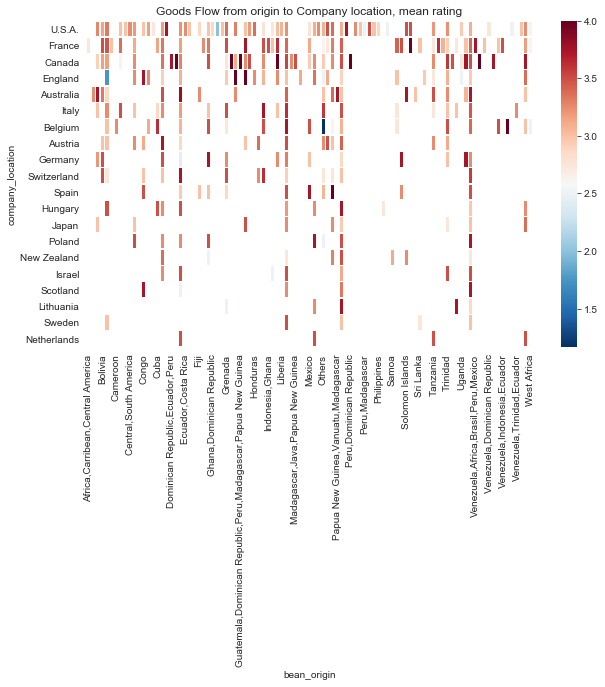

In [40]:
flow = pd.crosstab(
    choco['company_location'],
    choco['bean_origin'],
    choco['rating'], aggfunc='mean'
)
flow['good'] = flow.sum(axis=1)
flow = flow.sort_values('good', ascending=False)
flow = flow.drop('good', axis=1)

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Goods Flow from origin to Company location, mean rating')

Text(0.5, 1, 'Goods Flow from Company location, mean rating by years')

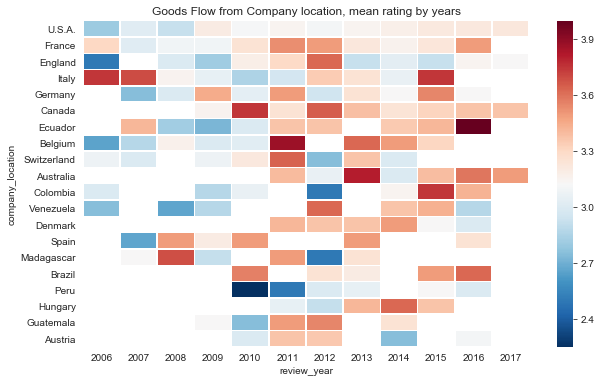

In [41]:
flow = pd.crosstab(
    choco['company_location'],
    choco['review_year'],
    choco['rating'], aggfunc='mean'
)
flow['good'] = flow.sum(axis=1)
flow = flow.sort_values('good', ascending=False)
flow = flow.drop('good', axis=1)

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Goods Flow from Company location, mean rating by years')